## Import Necessary Modules

In [39]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
import os
import librosa
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [3]:
scream_audio_directory = 'D:/Darshit/Fire Alarm System using Audio and Video Analysis/venv/SC'
def load_audio_files(directory):
    audio_data = []
    sample_rates = []

    for filename in os.listdir(directory):
        if filename.endswith('.wav'):
            file_path = os.path.join(directory, filename)
            x, sr = librosa.load(file_path, sr=None)
            audio_data.append(x)
            sample_rates.append(sr)

    return audio_data, sample_rates

# Load audio files from the specified directory
audio_data, sample_rates = load_audio_files(scream_audio_directory)

# Example usage:
for i, (audio, sr) in enumerate(zip(audio_data, sample_rates), 1):
    print(f"Audio {i}: Sample Rate - {sr}, Duration - {len(audio) / sr:.2f} seconds")


Audio 1: Sample Rate - 44100, Duration - 9.89 seconds
Audio 2: Sample Rate - 44100, Duration - 10.00 seconds
Audio 3: Sample Rate - 44100, Duration - 10.00 seconds
Audio 4: Sample Rate - 44100, Duration - 10.00 seconds
Audio 5: Sample Rate - 44100, Duration - 10.00 seconds
Audio 6: Sample Rate - 44100, Duration - 10.00 seconds
Audio 7: Sample Rate - 44100, Duration - 10.00 seconds
Audio 8: Sample Rate - 44100, Duration - 10.00 seconds
Audio 9: Sample Rate - 44100, Duration - 10.00 seconds
Audio 10: Sample Rate - 44100, Duration - 9.61 seconds
Audio 11: Sample Rate - 44100, Duration - 10.00 seconds
Audio 12: Sample Rate - 44100, Duration - 10.00 seconds
Audio 13: Sample Rate - 44100, Duration - 10.00 seconds
Audio 14: Sample Rate - 44100, Duration - 10.00 seconds
Audio 15: Sample Rate - 44100, Duration - 10.00 seconds
Audio 16: Sample Rate - 44100, Duration - 10.00 seconds
Audio 17: Sample Rate - 44100, Duration - 10.00 seconds
Audio 18: Sample Rate - 44100, Duration - 10.00 seconds
Aud

## Waveform Visualization for Screamed Data in (10 Seconds)

d:\Darshit\Fire Alarm System using Audio and Video Analysis\venv\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


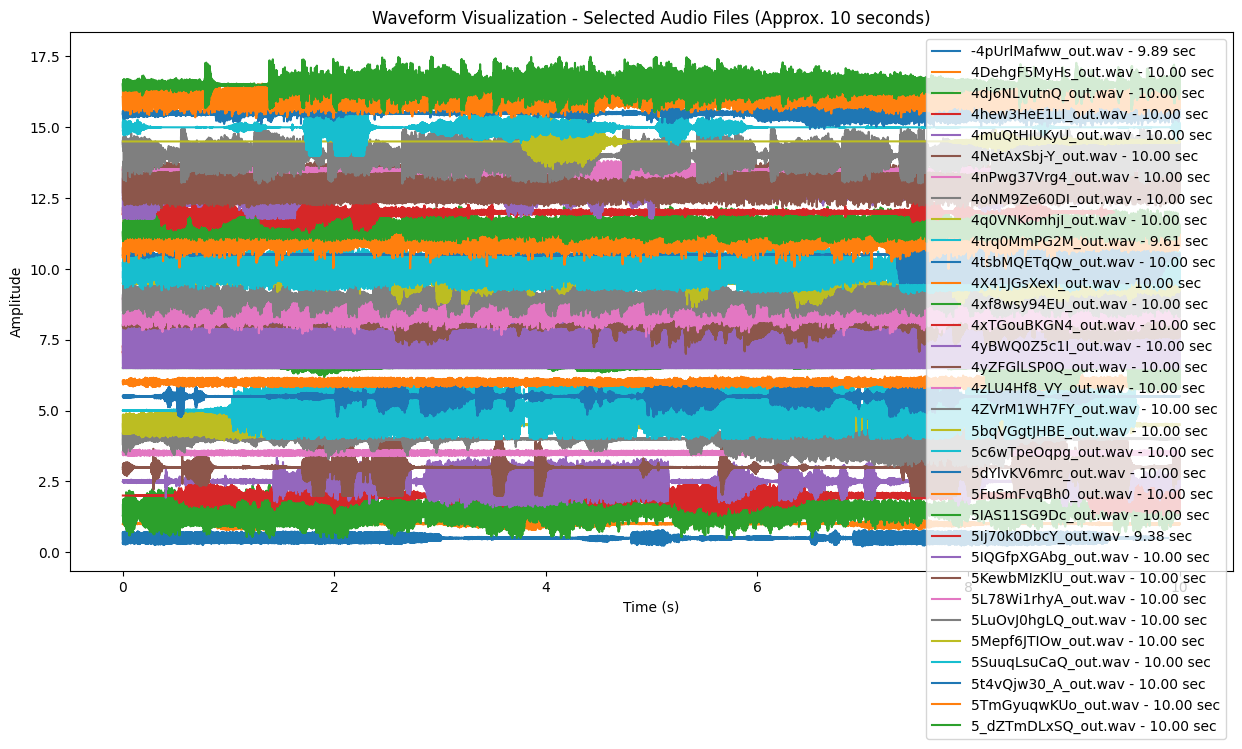

In [4]:
def load_and_filter_audio_files(directory, target_duration=10.0):
    selected_audio_data = []
    selected_sample_rates = []
    selected_filenames = []

    for filename in os.listdir(directory):
        if filename.endswith('.wav'):
            file_path = os.path.join(directory, filename)
            x, sr = librosa.load(file_path, sr=None)
            duration = len(x) / sr

            # Check if the duration is approximately 10 seconds
            if abs(duration - target_duration) < 1.0:
                selected_audio_data.append(x)
                selected_sample_rates.append(sr)
                selected_filenames.append(filename)
    return selected_audio_data, selected_sample_rates, selected_filenames

# Load and filter audio files from the specified directory
audio_data, sample_rates, filenames = load_and_filter_audio_files(scream_audio_directory)

# Plotting
plt.figure(figsize=(15, 7))

for i, (audio, sr, filename) in enumerate(zip(audio_data, sample_rates, filenames), 1):
    duration = len(audio) / sr
    time = np.linspace(0., duration, len(audio))
    plt.plot(time, audio + i * 0.5, label=f'{filename} - {duration:.2f} sec')

plt.title('Waveform Visualization - Selected Audio Files (Approx. 10 seconds)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

## Feature Extraction from Audio Files(MFCC) for Screamed Data
These coefficients capture essential information about the spectral content of a signal, providing a compact representation that is particularly useful for tasks like speech recognition, speaker identification, and music genre classification. By focusing on the distinctive features of the signal's frequency distribution, MFCCs are valuable in capturing unique patterns and variations in audio data.

In [5]:
def extract_mfccs(file_path, n_mfcc=13, max_frames=500):
    try:
        # Load audio file
        y, sr = librosa.load(file_path, sr=None)

        # Extract MFCCs with a fixed number of frames
        mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc, n_fft=400, hop_length=160)
        
        # Pad or truncate to ensure a consistent number of frames
        if mfccs.shape[1] < max_frames:
            mfccs = np.pad(mfccs, ((0, 0), (0, max_frames - mfccs.shape[1])))
        else:
            mfccs = mfccs[:, :max_frames]

        return mfccs.flatten()  # Flatten the MFCCs to a 1D array
    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return None
    
# Function to process all audio files in the directory
def process_all_audio_files(directory, n_mfcc=13):
    feature_matrix = []
    file_names = []

    for filename in os.listdir(directory):
        if filename.endswith('.wav'):
            file_path = os.path.join(directory, filename)
            mfccs = extract_mfccs(file_path, n_mfcc)

            if mfccs is not None:
                feature_matrix.append(mfccs)
                file_names.append(filename)

    return np.array(feature_matrix), file_names

# Extract MFCCs from all audio files in the specified directory
features, filenames = process_all_audio_files(scream_audio_directory)

# Print or further process the extracted features and file names
print("Extracted Features:")
print(features)
print("\nFile Names:")
print(filenames)

d:\Darshit\Fire Alarm System using Audio and Video Analysis\venv\Lib\site-packages\librosa\feature\spectral.py:2143: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  mel_basis = filters.mel(sr=sr, n_fft=n_fft, **kwargs)


Extracted Features:
[[-3.76048187e+02 -4.77740662e+02 -5.28638550e+02 ... -1.23482075e+01
  -1.38740864e+01 -5.17413998e+00]
 [-6.41457886e+02 -6.07498657e+02 -6.11884338e+02 ... -1.10442839e+01
  -7.67740917e+00 -1.00464525e+01]
 [-3.40289093e+02 -4.11221161e+02 -4.24988159e+02 ...  1.00595722e+01
   4.58588743e+00  6.54576445e+00]
 ...
 [-4.60425934e+02 -4.60952728e+02 -4.46633209e+02 ... -7.40289497e+00
  -2.44099855e+00  1.50807953e+00]
 [-3.80208466e+02 -4.06577240e+02 -4.07595276e+02 ... -1.50492897e+01
  -2.12742462e+01  1.63295650e+00]
 [-4.24521729e+02 -4.39002808e+02 -4.50296387e+02 ...  1.82028885e+01
   1.39696503e+01 -1.50167465e-01]]

File Names:
['-4pUrlMafww_out.wav', '4DehgF5MyHs_out.wav', '4dj6NLvutnQ_out.wav', '4hew3HeE1LI_out.wav', '4muQtHIUKyU_out.wav', '4NetAxSbj-Y_out.wav', '4nPwg37Vrg4_out.wav', '4oNM9Ze60DI_out.wav', '4q0VNKomhjI_out.wav', '4trq0MmPG2M_out.wav', '4tsbMQETqQw_out.wav', '4X41JGsXexI_out.wav', '4xf8wsy94EU_out.wav', '4xTGouBKGN4_out.wav', '4yBWQ0Z

## Plotting the MFCC Feature

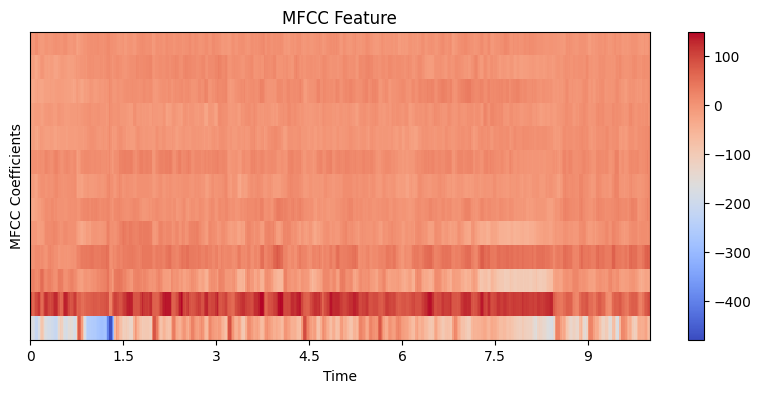

In [32]:
def plot_mfcc(file_path):
    # Load audio file
    y, sr = librosa.load(file_path)

    # Extract MFCC features
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)

    # Display the MFCC feature
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(mfccs, x_axis='time')
    plt.colorbar()
    plt.title('MFCC Feature')
    plt.xlabel('Time')
    plt.ylabel('MFCC Coefficients')
    plt.show()

# Example usage:
# Replace 'your_audio_file.wav' with the path to your actual audio file
file_path = 'screamed.wav'

# Plot MFCC features
plot_mfcc(file_path)


## Temporal List for Multiple Audio - Feature 

In [24]:
import librosa
import os

# Directory containing audio files
audio_directory = 'D:/Darshit/Fire Alarm System using Audio and Video Analysis/venv/SC'

# Function to extract tempo from audio files
def extract_tempo(audio_files):
    tempo_list = []

    for audio in audio_files:
        x, sr = librosa.load(audio)
        
        # Use onset_strength as a feature for tempo estimation
        onset_env = librosa.onset.onset_strength(y=x, sr=sr)

        # Estimate tempo using the onset envelope
        tempo, _ = librosa.beat.beat_track(onset_envelope=onset_env, sr=sr)
        tempo_list.append(tempo)

    return tempo_list

# Get a list of all audio files in the directory
audio_files = [os.path.join(audio_directory, file) for file in os.listdir(audio_directory) if file.endswith('.wav')]

# Extract tempo from audio files
tempo_list = extract_tempo(audio_files)

# Print or use the tempo values
print("Min Tempo : ", min(tempo_list))
print("Max Tempo : ", max(tempo_list))



Min Tempo :  83.35433467741936
Max Tempo :  198.76802884615384


## Waveform for Screaming Audio Files for 10 Seconds Duration

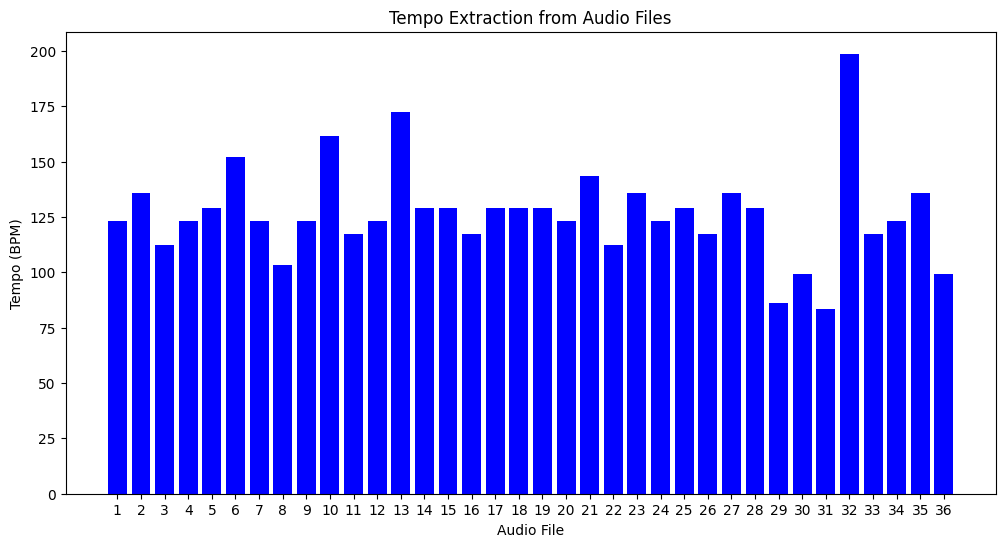

In [7]:
# Plotting
plt.figure(figsize=(12, 6))
plt.bar(range(1, len(tempo_list) + 1), tempo_list, color='blue')
plt.xlabel('Audio File')
plt.ylabel('Tempo (BPM)')
plt.title('Tempo Extraction from Audio Files')
plt.xticks(range(1, len(tempo_list) + 1))
plt.show()

In [16]:
audio_directory = 'D:/Darshit/Fire Alarm System using Audio and Video Analysis/venv/Sc'
# Get a list of all audio files in the directory
audio_files = [os.path.join(audio_directory, file) for file in os.listdir(audio_directory) if file.endswith('.wav')]

## Feature Extraction for Screamed files(CHROMA)
Chroma features are representations of the energy distribution across pitch classes in a musical signal. The chromagram, derived from chroma features, encapsulates the intensity of each pitch class over time.Each chroma feature corresponds to one of the twelve pitch classes, forming a concise descriptor of the harmonic content of an audio signal. Chroma features are widely utilized in audio processing applications to extract musically relevant information and enhance the understanding of tonal structures within music signals.

In [19]:
def extract_chroma(file_path):
    # Load audio file
    y, sr = librosa.load(file_path)
    # Extract Chroma features
    chroma = librosa.feature.chroma_stft(y=y, sr=sr, n_chroma=12)
    return chroma, sr

# Example usage:
# Replace 'your_audio_directory' with the path to the directory containing your audio files
audio_directory = 'D:/Darshit/Fire Alarm System using Audio and Video Analysis/venv/Sc'

# Get a list of all audio files in the directory
audio_files = [os.path.join(audio_directory, file) for file in os.listdir(audio_directory) if file.endswith('.wav')]

# Loop through each audio file, extract Chroma features, and plot them
for i, file_path in enumerate(audio_files, 1):
    chroma_features, sample_rate = extract_chroma(file_path)
    plot_title = f'Chroma Feature - Audio File {i}'

Chroma Feature Values:
[[0.08319017 0.03846155 0.02939782 ... 0.9068053  0.9840269  0.5622549 ]
 [0.16745074 0.1756248  0.18070455 ... 1.         1.         1.        ]
 [0.1235761  0.16816247 0.19702715 ... 0.7956284  0.6376422  0.5914586 ]
 ...
 [0.21281777 0.21490964 0.24972352 ... 0.27868968 0.3779921  0.29898876]
 [0.10843449 0.05591376 0.05342393 ... 0.43105227 0.53946763 0.30290362]
 [0.04482811 0.00931011 0.00481398 ... 0.6760319  0.78977793 0.36603904]]


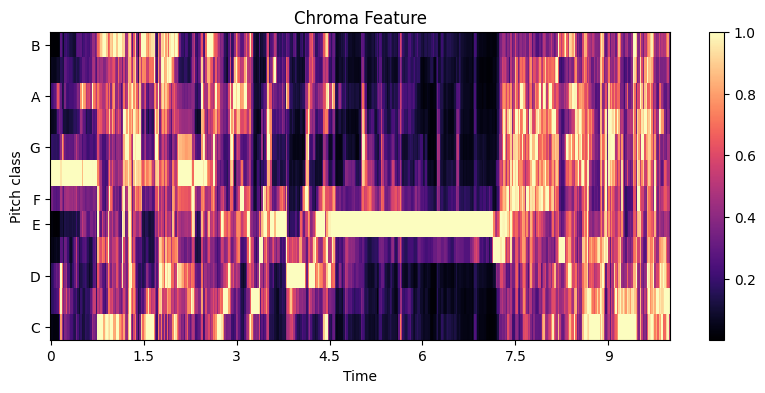

In [33]:
def plot_chroma_values(chroma, sr):
    # Display the Chroma feature values
    print("Chroma Feature Values:")
    print(chroma)

    # Plot Chroma feature
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(chroma, y_axis='chroma', x_axis='time')
    plt.colorbar()
    plt.title('Chroma Feature')
    plt.show()

# Example usage:
# Replace 'your_audio_file.wav' with the path to your actual audio file
file_path = 'screamed.wav'

# Extract Chroma features and plot
chroma_features, sample_rate = extract_chroma(file_path)
plot_chroma_values(chroma_features, sample_rate)


## Feature Extraction for Screamed Data(Spectral Contrast)
 Spectral contrast is a feature that quantifies the difference in amplitude between peaks and valleys in the frequency spectrum of a signal. Calculated by determining the contrast between the magnitudes of the spectral peaks and valleys, this feature reflects the prominence and distinctiveness of different frequency components.

Spectral Contrast Feature Values:
[[16.10902551 19.72682053 26.06269522 ... 19.56731662 18.60078594
  11.98306493]
 [10.10125708 15.27272331 24.12804425 ... 15.75526986 15.60691629
  10.99107993]
 [14.06350814 17.18580235 22.43201333 ...  9.4428608  14.50870537
  13.61812625]
 ...
 [17.71157689 22.96070242 21.24246224 ... 15.28731145 14.6348591
  15.51258131]
 [17.91334171 20.40777122 20.14836433 ... 19.34812607 16.99828322
  18.72757205]
 [29.73120347 34.78548504 41.67007558 ... 45.69129618 22.22769682
  13.06513681]]


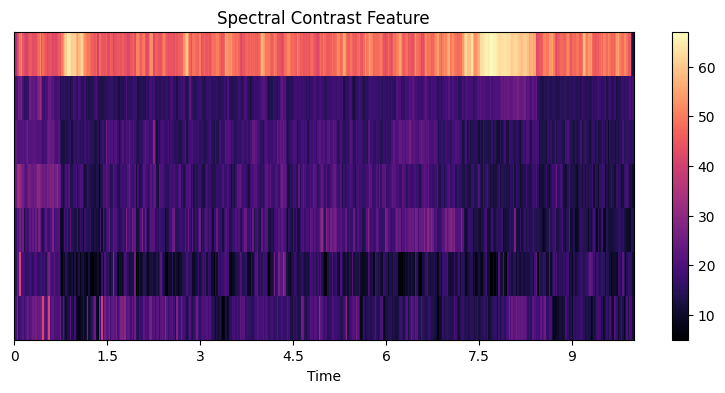

In [34]:
def extract_spectral_contrast(file_path):
    # Load audio file
    y, sr = librosa.load(file_path)

    # Extract Spectral Contrast features
    spectral_contrast = librosa.feature.spectral_contrast(y=y, sr=sr)

    return spectral_contrast, sr

def plot_spectral_contrast_values(spectral_contrast, sr):
    # Display the Spectral Contrast feature values
    print("Spectral Contrast Feature Values:")
    print(spectral_contrast)

    # Plot Spectral Contrast feature
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(spectral_contrast, x_axis='time')
    plt.colorbar()
    plt.title('Spectral Contrast Feature')
    plt.show()

# Example usage:
# Replace 'your_audio_file.wav' with the path to your actual audio file
file_path = 'screamed.wav'

# Extract Spectral Contrast features and plot
spectral_contrast_features, sample_rate = extract_spectral_contrast(file_path)
plot_spectral_contrast_values(spectral_contrast_features, sample_rate)


## Non-Screaming Files for the duration of 10 seconds 

d:\Darshit\Fire Alarm System using Audio and Video Analysis\venv\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


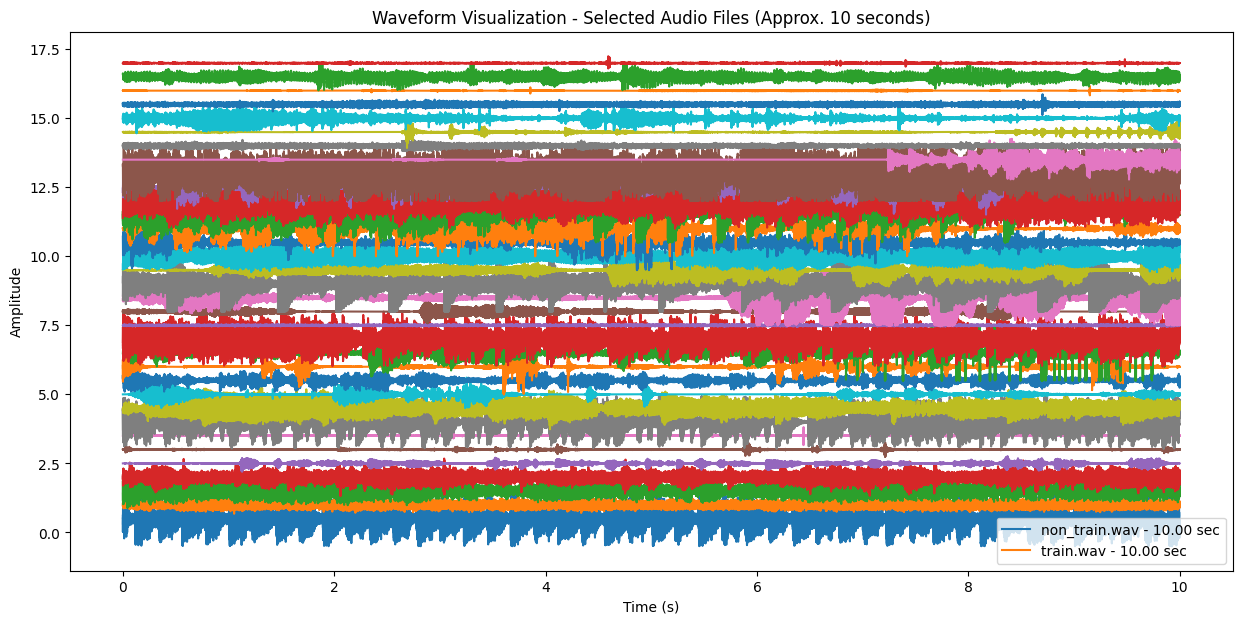

In [12]:
non_audio_directory="D:/Darshit/Fire Alarm System using Audio and Video Analysis/venv/NC"

def load_and_filter_audio_files(directory, target_duration=10.0):
    selected_audio_data = []
    selected_sample_rates = []
    selected_filenames = []

    for filename in os.listdir(directory):
        if filename.endswith('.wav'):
            file_path = os.path.join(directory, filename)
            x, sr = librosa.load(file_path, sr=None)
            duration = len(x) / sr

            # Check if the duration is approximately 10 seconds
            if abs(duration - target_duration) < 1.0:
                selected_audio_data.append(x)
                selected_sample_rates.append(sr)
                selected_filenames.append(filename)
    return selected_audio_data, selected_sample_rates, selected_filenames

# Load and filter audio files from the specified directory
audio_data, sample_rates, filenames = load_and_filter_audio_files(non_audio_directory)

# Plotting
plt.figure(figsize=(15, 7))

for i, (audio, sr, filename) in enumerate(zip(audio_data, sample_rates, filenames), 1):
    duration = len(audio) / sr
    time = np.linspace(0., duration, len(audio))
    plt.plot(time, audio + i * 0.5, label=f'{filename} - {duration:.2f} sec')

plt.title('Waveform Visualization - Selected Audio Files (Approx. 10 seconds)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

## Feature Extraction for Non-Screamed Data (MFCC)

In [14]:
def extract_mfccs(file_path, n_mfcc=13, max_frames=500):
    try:
        # Load audio file
        y, sr = librosa.load(file_path, sr=None)

        # Extract MFCCs with a fixed number of frames
        mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc, n_fft=400, hop_length=160)
        
        # Pad or truncate to ensure a consistent number of frames
        if mfccs.shape[1] < max_frames:
            mfccs = np.pad(mfccs, ((0, 0), (0, max_frames - mfccs.shape[1])))
        else:
            mfccs = mfccs[:, :max_frames]

        return mfccs.flatten()  # Flatten the MFCCs to a 1D array
    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return None
    
# Function to process all audio files in the directory
def process_all_audio_files(directory, n_mfcc=13):
    feature_matrix = []
    file_names = []

    for filename in os.listdir(directory):
        if filename.endswith('.wav'):
            file_path = os.path.join(directory, filename)
            mfccs = extract_mfccs(file_path, n_mfcc)

            if mfccs is not None:
                feature_matrix.append(mfccs)
                file_names.append(filename)

    return np.array(feature_matrix), file_names

# Extract MFCCs from all audio files in the specified directory
features, filenames = process_all_audio_files(non_audio_directory)

# Print or further process the extracted features and file names
print("Extracted Features:")
print(features)
print("\nFile Names:")
print(filenames)

d:\Darshit\Fire Alarm System using Audio and Video Analysis\venv\Lib\site-packages\librosa\feature\spectral.py:2143: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  mel_basis = filters.mel(sr=sr, n_fft=n_fft, **kwargs)


Extracted Features:
[[-295.69354   -273.8421    -286.87558   ...  -10.669605   -13.447828
   -15.285981 ]
 [-494.00998   -495.7503    -498.86652   ...    6.508929    10.639554
     3.0969281]
 [-352.6357    -412.4312    -407.9998    ...   15.698703    24.451323
    13.254808 ]
 ...
 [-735.38635   -743.9295    -747.8266    ...   -9.498354   -18.572412
    -7.5534873]
 [-417.32803   -561.714     -581.19354   ...  -16.48982     -7.6845536
   -13.809377 ]
 [-689.30664   -679.7572    -680.1453    ...    8.94127      5.264234
     5.187828 ]]

File Names:
['non_train.wav', 'train.wav', '_0Jd6JJeyJ4_out.wav', '_0M9Tl1fx4Y_out.wav', '_1VZUONWYm4_out.wav', '_3zEO-HtX8o_out.wav', '_4VCZp20FfM_out.wav', '_5jnoa5nk-s_out.wav', '_6uP5AkskmE_out.wav', '_9RcwKnHbQw_out.wav', '_AJqf3uJTkw_out.wav', '_dC8CtfWaoM_out.wav', '_ezunRBSAQA_out.wav', '_GjHL0FkYoY_out.wav', '_gr5-gZN29E_out.wav', '_H4iHqtGlAY_out.wav', '_hT6LiQ1Cg0_out.wav', '_J0wHlXPe34_out.wav', '_JM795qREAI_out.wav', '_kPmYc1nXuQ_out.wav',

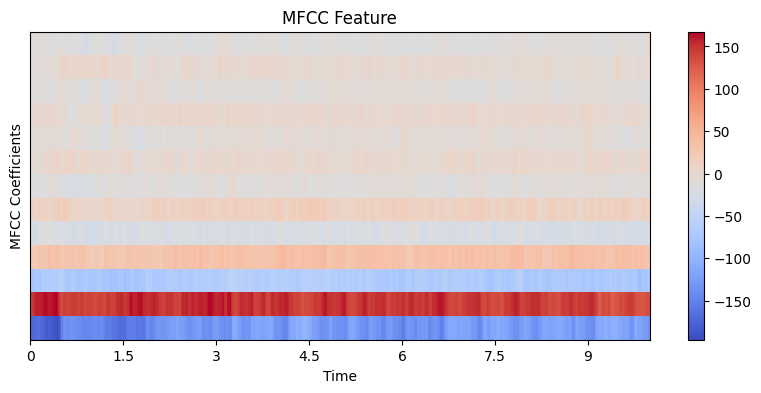

In [35]:
def plot_mfcc(file_path):
    # Load audio file
    y, sr = librosa.load(file_path)

    # Extract MFCC features
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)

    # Display the MFCC feature
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(mfccs, x_axis='time')
    plt.colorbar()
    plt.title('MFCC Feature')
    plt.xlabel('Time')
    plt.ylabel('MFCC Coefficients')
    plt.show()

# Example usage:
# Replace 'your_audio_file.wav' with the path to your actual audio file
file_path = 'non-screamed.wav'

# Plot MFCC features
plot_mfcc(file_path)


## Feature Extraction for Non Screamed Data (CHROMA)

In [36]:
def extract_chroma(file_path):
    # Load audio file
    y, sr = librosa.load(file_path)
    # Extract Chroma features
    chroma = librosa.feature.chroma_stft(y=y, sr=sr, n_chroma=12)
    return chroma, sr

# Example usage:
# Replace 'your_audio_directory' with the path to the directory containing your audio files
audio_directory = 'D:/Darshit/Fire Alarm System using Audio and Video Analysis/venv/NC'

# Get a list of all audio files in the directory
audio_files = [os.path.join(audio_directory, file) for file in os.listdir(audio_directory) if file.endswith('.wav')]

# Loop through each audio file, extract Chroma features, and plot them
for i, file_path in enumerate(audio_files, 1):
    chroma_features, sample_rate = extract_chroma(file_path)
    plot_title = f'Chroma Feature - Audio File {i}'

Chroma Feature Values:
[[0.8581262  1.         0.8874867  ... 0.3961299  0.4451499  0.37354097]
 [0.211654   0.29468462 0.22332115 ... 1.         1.         0.5478636 ]
 [0.17392513 0.19885378 0.19581473 ... 0.3106248  0.28373355 0.24107529]
 ...
 [0.5948004  0.92731386 0.7251081  ... 0.16267973 0.24903041 0.25535646]
 [0.40563247 0.40022802 0.43238485 ... 0.25117698 0.29251912 0.38152704]
 [1.         0.8489366  0.8073398  ... 0.35889673 0.6241984  1.        ]]


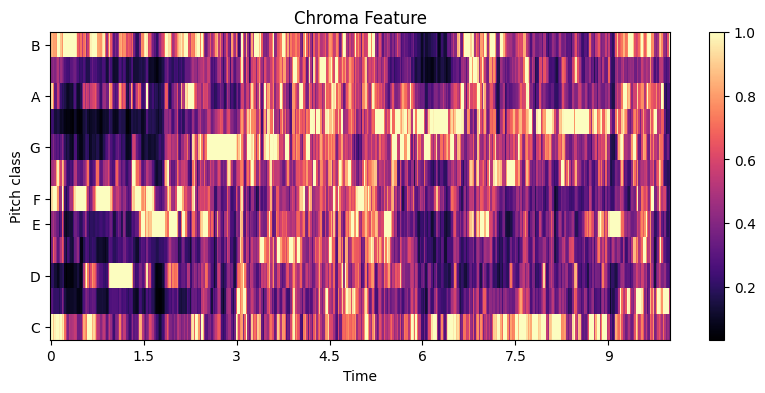

In [37]:
def plot_chroma_values(chroma, sr):
    # Display the Chroma feature values
    print("Chroma Feature Values:")
    print(chroma)

    # Plot Chroma feature
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(chroma, y_axis='chroma', x_axis='time')
    plt.colorbar()
    plt.title('Chroma Feature')
    plt.show()

# Example usage:
# Replace 'your_audio_file.wav' with the path to your actual audio file
file_path = 'non-screamed.wav'

# Extract Chroma features and plot
chroma_features, sample_rate = extract_chroma(file_path)
plot_chroma_values(chroma_features, sample_rate)


## Feature Extraction for Non-Screamed Data (SPECTRAL CONTRAST)

Spectral Contrast Feature Values:
[[16.63346337 23.54380055 14.99699655 ... 13.02665152 17.7737147
  13.78201029]
 [ 8.66575311 15.35295399 21.4339623  ... 11.34168525 14.19581463
  11.22751681]
 [12.20700341 14.83121044 17.63305523 ... 11.82073984 12.44752688
  22.96380702]
 ...
 [17.71722818 23.53161116 23.28749688 ... 16.34627494 17.28998428
  16.77993364]
 [22.13422716 25.39250139 28.18655568 ... 25.12784471 22.78593028
  22.67271486]
 [18.10474523 21.2339319  55.90796937 ... 62.53046451 27.33382405
  16.82756646]]


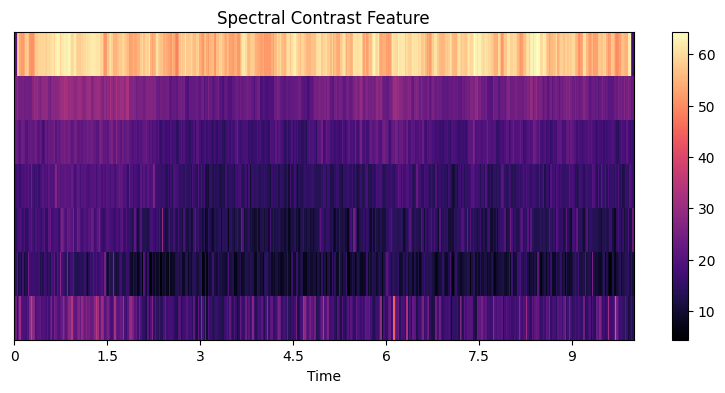

In [38]:
def extract_spectral_contrast(file_path):
    # Load audio file
    y, sr = librosa.load(file_path)

    spectral_contrast = librosa.feature.spectral_contrast(y=y, sr=sr)

    return spectral_contrast, sr

def plot_spectral_contrast_values(spectral_contrast, sr):
    # Display the Spectral Contrast feature values
    print("Spectral Contrast Feature Values:")
    print(spectral_contrast)

    # Plot Spectral Contrast feature
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(spectral_contrast, x_axis='time')
    plt.colorbar()
    plt.title('Spectral Contrast Feature')
    plt.show()
file_path = 'non-screamed.wav'

# Extract Spectral Contrast features and plot
spectral_contrast_features, sample_rate = extract_spectral_contrast(file_path)
plot_spectral_contrast_values(spectral_contrast_features, sample_rate)

## MODEL BUILDING 
The Model will identify the Audio Files whether Screamed or not using Keras Library from the Tensorflow. We will extract Features and labels from the datasets and then use it for further Model Building

In [46]:
def extract_mfccs(y, sr, n_mfcc=13, max_frames=500):
    try:
        # Extract MFCCs with a fixed number of frames
        mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc, n_fft=400, hop_length=160)
        
        # Pad or truncate to ensure a consistent number of frames
        if mfccs.shape[1] < max_frames:
            mfccs = np.pad(mfccs, ((0, 0), (0, max_frames - mfccs.shape[1])))
        else:
            mfccs = mfccs[:, :max_frames]

        return mfccs.flatten()  # Flatten the MFCCs to a 1D array
    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return None
def extract_chroma(y, sr, max_frames=500):
    try:
        chroma = librosa.feature.chroma_stft(y, sr=sr)
        
        # Pad or truncate Chroma features
        max_frames_chroma = min(max_frames, chroma.shape[1])
        chroma = np.pad(chroma, ((0, 0), (0, max_frames_chroma - chroma.shape[1])))

        return chroma.flatten()
    except Exception as e:
        print(f"Error extracting chroma features: {e}")
        return None

def extract_spectral_contrast(y, sr, max_frames=500):
    try:
        spectral_contrast = librosa.feature.spectral_contrast(y, sr=sr)
        
        # Pad or truncate Spectral Contrast features
        max_frames_contrast = min(max_frames, spectral_contrast.shape[1])
        spectral_contrast = np.pad(spectral_contrast, ((0, 0), (0, max_frames_contrast - spectral_contrast.shape[1])))

        return spectral_contrast.flatten()
    except Exception as e:
        print(f"Error extracting spectral contrast features: {e}")
        return None

In [ ]:
def process_all_audio_files(directory, label):
    feature_list = [] 
    labels = []
    for filename in os.listdir(directory):
        if filename.endswith('.wav'):
            file_path = os.path.join(directory, filename)
            y, sr = librosa.load(file_path, sr=None)
            mfccs = extract_mfccs(y, sr, n_mfcc=13)
            chroma = librosa.feature.chroma_stft(y, sr)
            spectral_contrast = librosa.feature.spectral_contrast(y, sr)
            chroma = np.expand_dims(chroma, axis=0)
            spectral_contrast = np.expand_dims(spectral_contrast, axis=0)
            features = np.concatenate([mfccs, chroma, spectral_contrast], axis=0) 
            feature_list.append(features)
            labels.append(label)
    return feature_list, labels

scream_audio_directory = 'D:/Darshit/Fire Alarm System using Audio and Video Analysis/venv/SC'
non_scream_audio_directory = 'D:/Darshit/Fire Alarm System using Audio and Video Analysis/venv/NC'
scream_features, scream_labels = process_all_audio_files(scream_audio_directory, label='screamed')
non_scream_features, non_scream_labels = process_all_audio_files(non_scream_audio_directory, label='non-screamed')
all_features = np.vstack((scream_features, non_scream_features))
all_labels = np.hstack((scream_labels, non_scream_labels))
X_train, X_test, y_train, y_test = train_test_split(all_features, all_labels, test_size=0.2, random_state=42)
clf = SVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

### Tried the Model Building but we were unable to do due to incapable hardware capacity and also the Audio size  is too large. Due to this we will require a higher  spec machine for model building. Audio resampling needs to be done in order to convert into a single shape and then use it for further prediction